#Introduccion

Este proyecto tiene como objetivo analizar y segmentar clientes de Coto en el área de San Justo, Buenos Aires, a partir de variables como edad, gasto promedio, visitas mensuales, nivel de fidelidad y método de pago. La finalidad es descubrir patrones de comportamiento que ayuden a personalizar estrategias comerciales y mejorar la experiencia del cliente

#Preguntas

*   ¿Qué relación existe entre edad y gasto promedio?

*   ¿Los clientes con más visitas mensuales gastan más?

*   ¿Cómo varía el nivel de fidelidad según la sucursal?

*   ¿Qué métodos de pago prefieren los clientes más valiosos?

*   ¿Existen segmentos de clientes bien diferenciados?

#Hipotesis

*   Los clientes más jóvenes realizan más visitas, pero gastan menos por compra.

*   Los clientes con nivel de fidelidad alto tienen un gasto promedio mayor.

*   Existen grupos de clientes con patrones de consumo distintos que pueden ser segmentados eficazmente.

*   El gasto promedio varía significativamente entre sucursales.

#Librerias

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

#Preconfiguracion

In [69]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

#Cargar Datos

In [70]:
df = pd.read_csv("/content/clientes_coto.csv")

#Recopilación y preparación de datos

In [71]:
print("Primeras filas:")
print(df.head())

Primeras filas:
   cliente_id  edad       sexo     sucursal  visitas_mensuales  \
0        9416    26   Femenino  Ramos Mejía                  3   
1        7855    54  Masculino  Ramos Mejía                  2   
2        2355    72  Masculino  Ramos Mejía                  2   
3        8307    69   Femenino    San Justo                  2   
4        6962    66   Femenino   La Matanza                  3   

   gasto_promedio método_pago_frecuente nivel_fidelidad  
0         7263.18              Efectivo          Básico  
1        22751.55        Tarjeta Débito          Básico  
2        21902.13        Tarjeta Débito       Frecuente  
3         6159.98        Tarjeta Débito       Frecuente  
4        21959.49              Efectivo       Frecuente  


In [72]:
print("\nDimensiones:")
print(df.shape)


Dimensiones:
(900, 8)


In [73]:
print("\nTipos de datos:")
print(df.dtypes)


Tipos de datos:
cliente_id                 int64
edad                       int64
sexo                      object
sucursal                  object
visitas_mensuales          int64
gasto_promedio           float64
método_pago_frecuente     object
nivel_fidelidad           object
dtype: object


In [74]:
print("\nNulos por columna:")
print(df.isnull().sum())


Nulos por columna:
cliente_id               0
edad                     0
sexo                     0
sucursal                 0
visitas_mensuales        0
gasto_promedio           0
método_pago_frecuente    0
nivel_fidelidad          0
dtype: int64


In [75]:
print("\nEstadísticas descriptivas:")
print(df.describe(include='all'))


Estadísticas descriptivas:
         cliente_id        edad      sexo     sucursal  visitas_mensuales  \
count    900.000000  900.000000       900          900         900.000000   
unique          NaN         NaN         2            3                NaN   
top             NaN         NaN  Femenino  Ramos Mejía                NaN   
freq            NaN         NaN       461          303                NaN   
mean    5463.753333   46.654444       NaN          NaN           3.030000   
std     2624.138927   16.844031       NaN          NaN           1.894958   
min     1012.000000   18.000000       NaN          NaN          -1.000000   
25%     3104.250000   32.000000       NaN          NaN           2.000000   
50%     5458.000000   47.000000       NaN          NaN           3.000000   
75%     7831.500000   61.000000       NaN          NaN           4.000000   
max     9998.000000   75.000000       NaN          NaN          13.000000   

        gasto_promedio método_pago_frecuente ni

#Analisis Descriptivo

## Clientes por sucursal

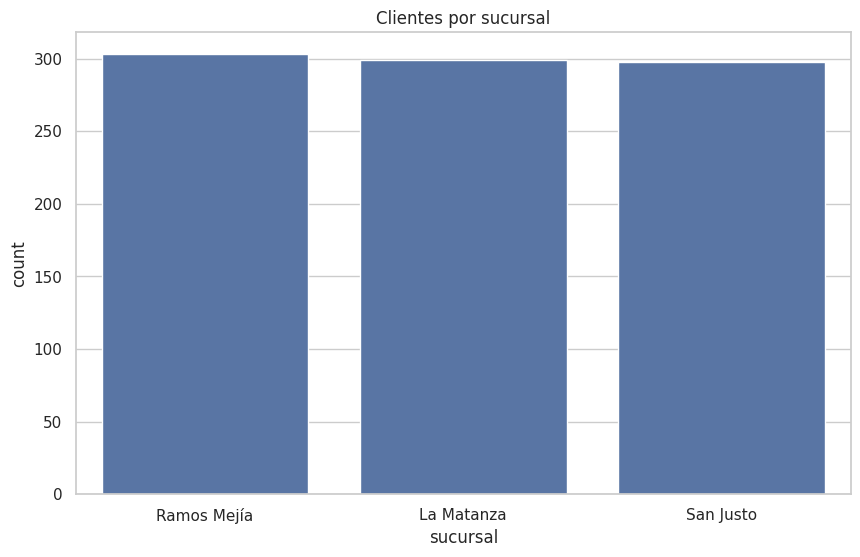

In [76]:
sns.countplot(data=df, x='sucursal', order=df['sucursal'].value_counts().index)
plt.title("Clientes por sucursal")
plt.show()

## Sexo

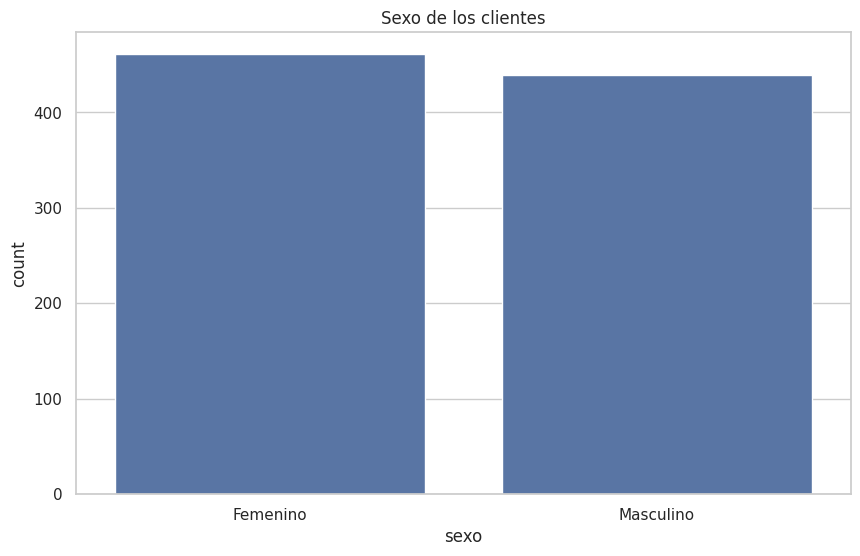

In [77]:

sns.countplot(data=df, x='sexo')
plt.title("Sexo de los clientes")
plt.show()

## Nivel de fidelidad

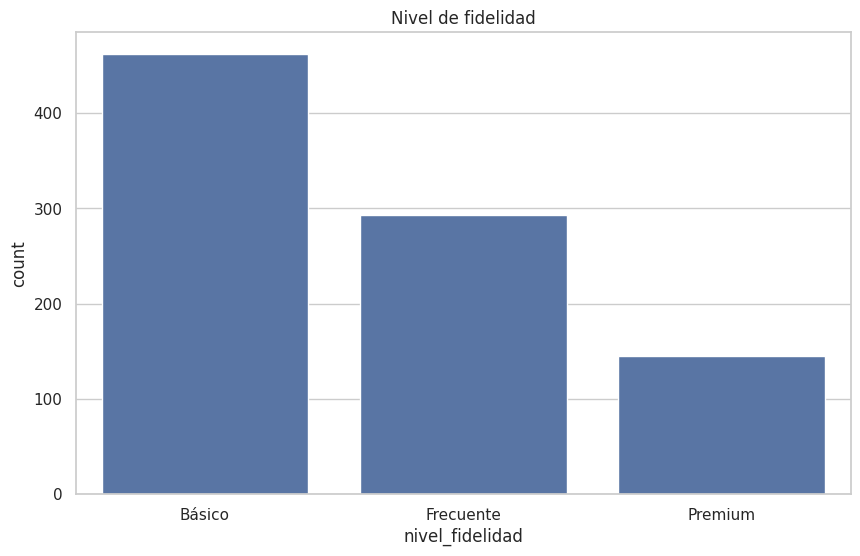

In [78]:
orden_nivel = ['Básico', 'Frecuente', 'Premium']
sns.countplot(data=df, x='nivel_fidelidad', order=orden_nivel)
plt.title("Nivel de fidelidad")
plt.show()

## Método de pago

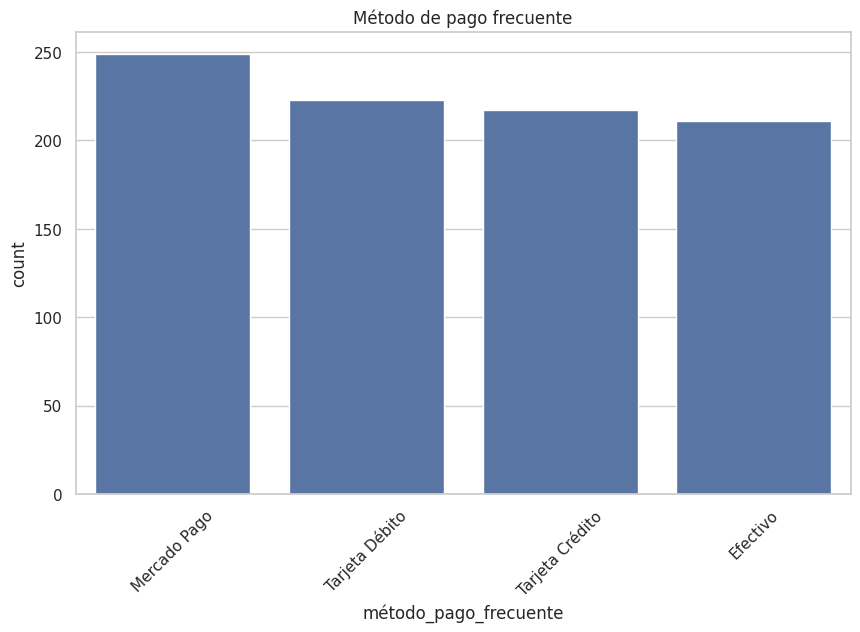

In [79]:
sns.countplot(data=df, x='método_pago_frecuente', order=df['método_pago_frecuente'].value_counts().index)
plt.title("Método de pago frecuente")
plt.xticks(rotation=45)
plt.show()

## Edad

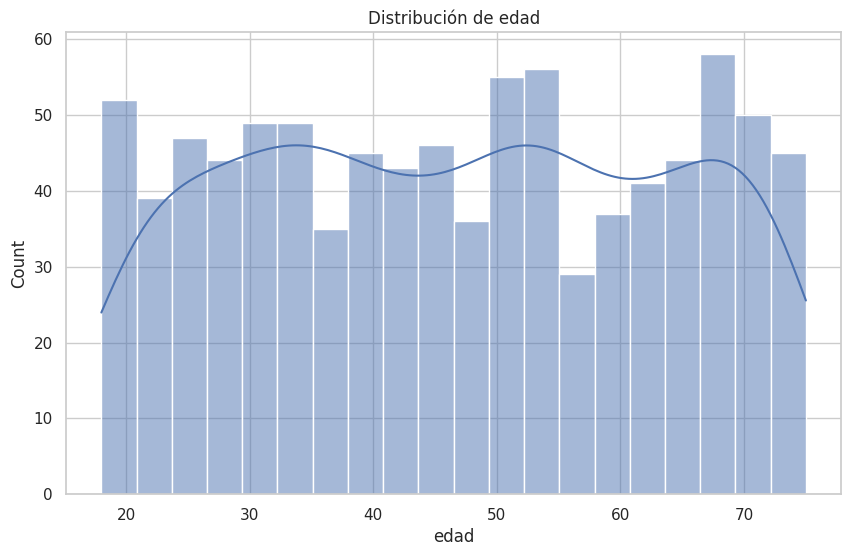

In [80]:
sns.histplot(df['edad'], bins=20, kde=True)
plt.title("Distribución de edad")
plt.show()

## Gasto promedio

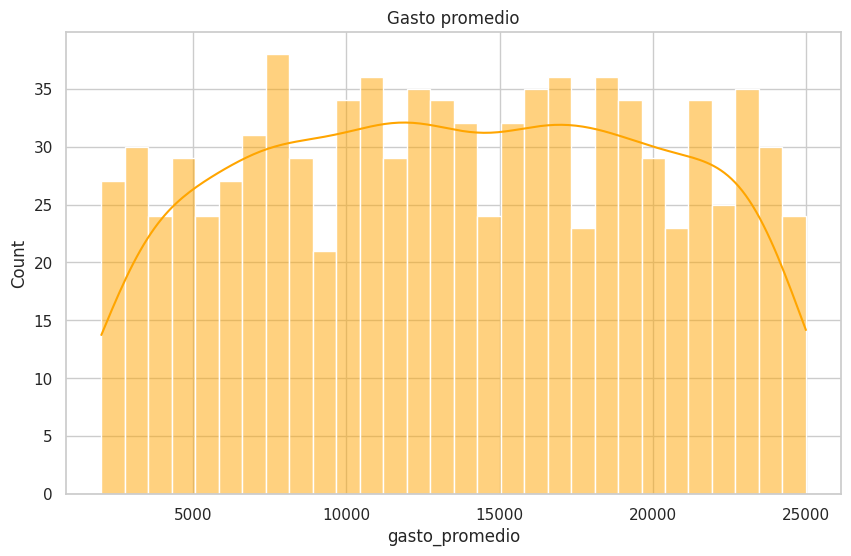

In [81]:
sns.histplot(df['gasto_promedio'], bins=30, kde=True, color='orange')
plt.title("Gasto promedio")
plt.show()

## Visitas mensuales

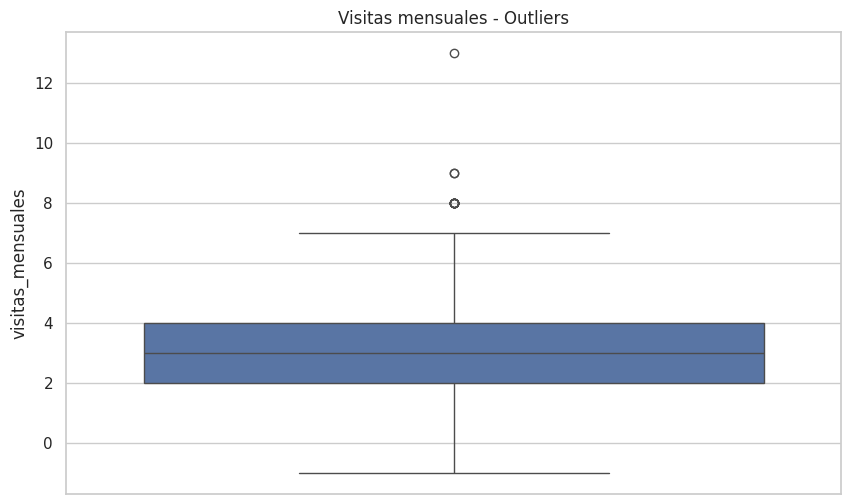

In [82]:
sns.boxplot(data=df, y='visitas_mensuales')
plt.title("Visitas mensuales - Outliers")
plt.show()

#Analisis de Relaciones

## Edad vs Gasto

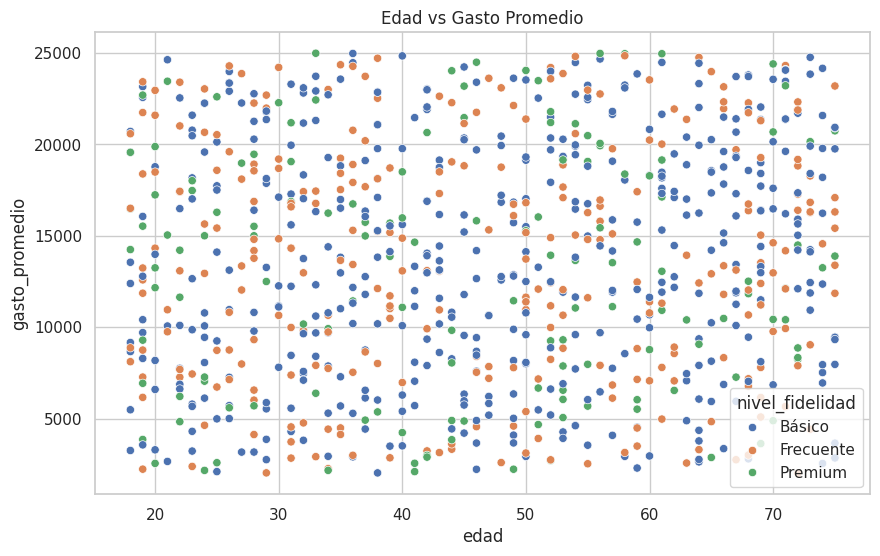

In [83]:
sns.scatterplot(data=df, x='edad', y='gasto_promedio', hue='nivel_fidelidad')
plt.title("Edad vs Gasto Promedio")
plt.show()

## Visitas vs Gasto

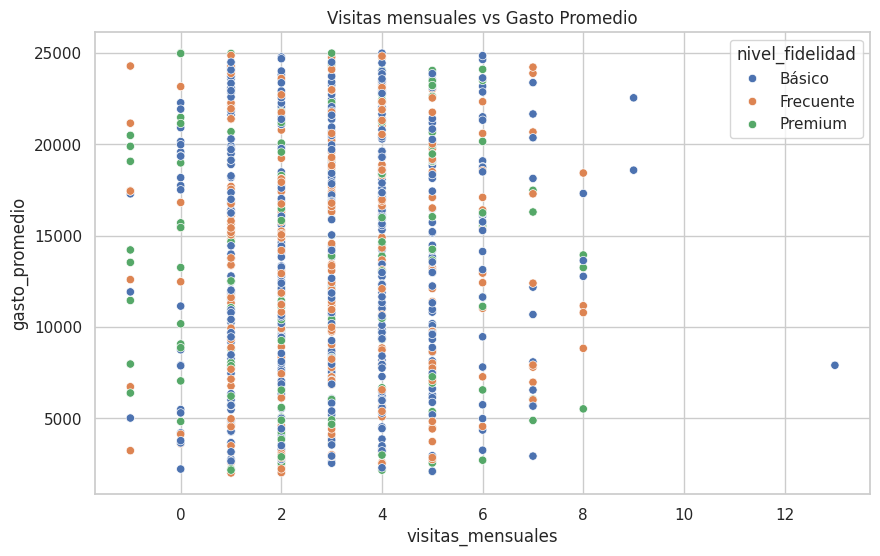

In [84]:
sns.scatterplot(data=df, x='visitas_mensuales', y='gasto_promedio', hue='nivel_fidelidad')
plt.title("Visitas mensuales vs Gasto Promedio")
plt.show()

## Matriz de correlación

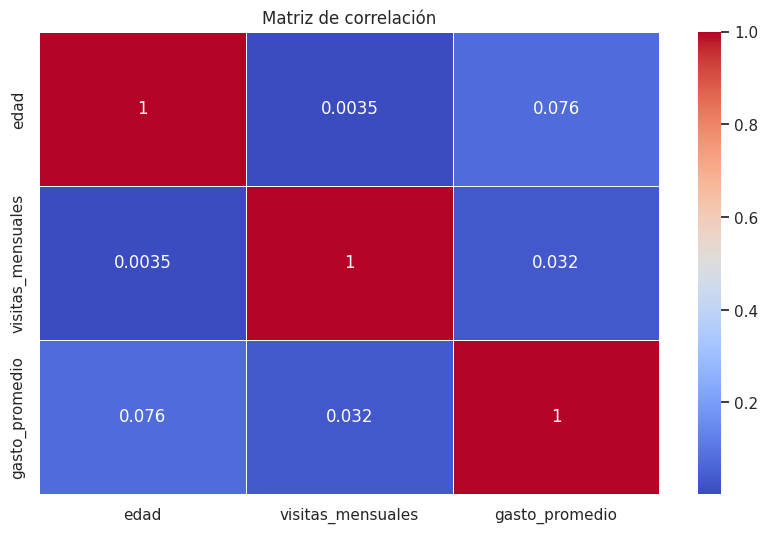

In [85]:
corr_matrix = df[['edad', 'visitas_mensuales', 'gasto_promedio']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

## Diagrama de dispersión: edad vs visitas mensuales

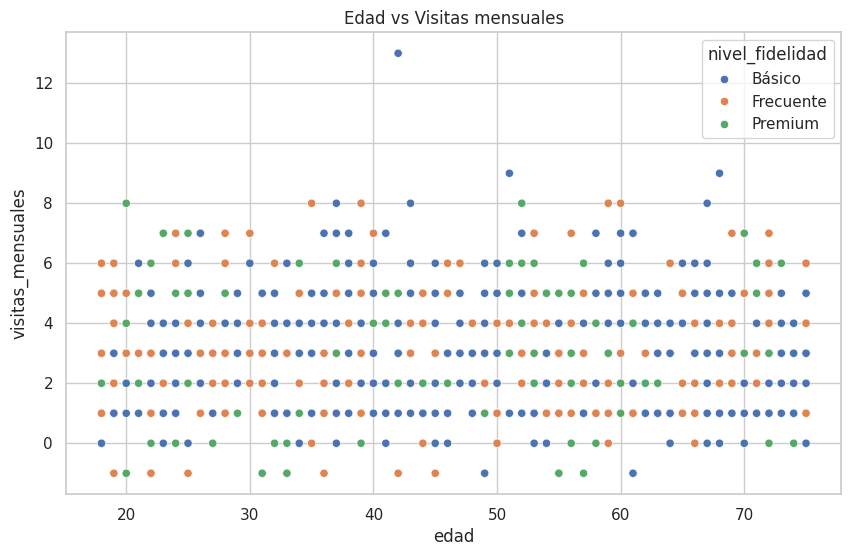

In [86]:
sns.scatterplot(data=df, x='edad', y='visitas_mensuales', hue='nivel_fidelidad')
plt.title("Edad vs Visitas mensuales")
plt.show()

## Pairplot para relaciones múltiples

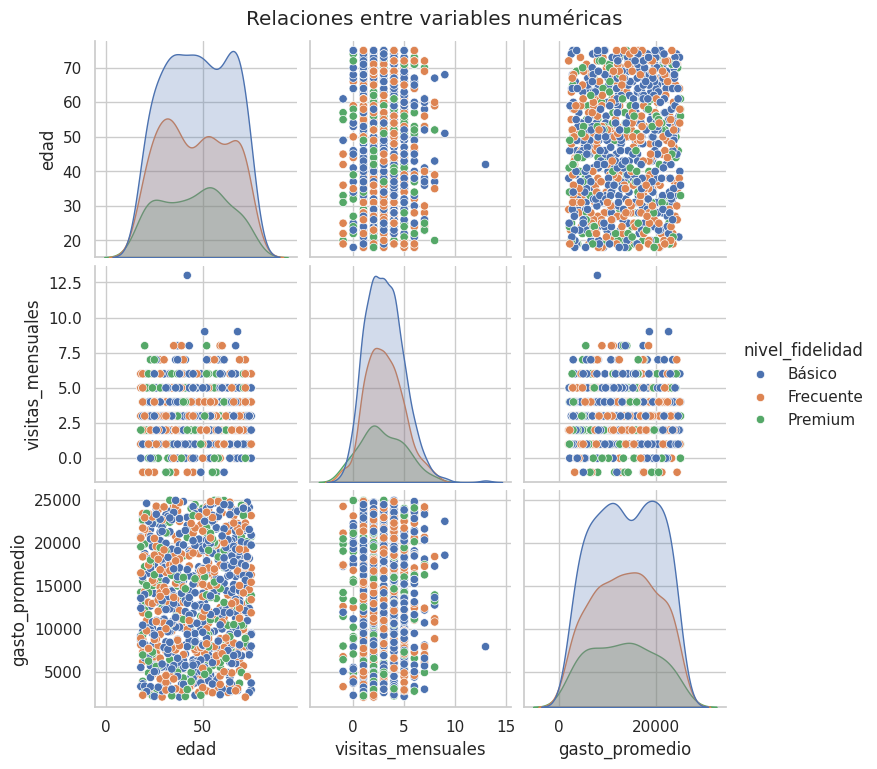

In [87]:
sns.pairplot(df[['edad', 'visitas_mensuales', 'gasto_promedio', 'nivel_fidelidad']], hue='nivel_fidelidad')
plt.suptitle("Relaciones entre variables numéricas", y=1.02)
plt.show()

#Iteración y refinamiento

**Observaciones clave de los gráficos:**
*   La mayoría de los clientes se concentran en algunas sucursales
*   Hay una distribución de edad con un pico notable
*   La distribución del gasto promedio muestra una cola hacia la derecha (pocos clientes con gastos muy altos)
*   El scatter plot de Edad vs Gasto Promedio sugiere que no hay una correlación lineal fuerte, pero los clientes "Premium" tienden a tener un gasto promedio más alto, independientemente de la edad
*   El scatter plot de Visitas Mensuales vs Gasto Promedio muestra una posible tendencia: a más visitas, mayor gasto, especialmente para los clientes "Premium"
*   La matriz de correlación confirma correlaciones débiles entre las variables numéricas principales, aunque hay una correlación positiva notable entre visitas_mensuales y gasto_promedio
*   El pairplot refuerza las observaciones anteriores y muestra las distribuciones y relaciones por nivel de fidelidad

**Nuevas Preguntas:**
1.  ¿Cómo se distribuye el *gasto promedio por visita* para los diferentes niveles de fidelidad y rangos de edad? (Calcular una nueva métrica)
2.  ¿Existe alguna sucursal donde el gasto promedio sea significativamente diferente, incluso ajustando por el nivel de fidelidad de sus clientes?
3.  ¿Los clientes que pagan con tarjeta de crédito tienen un gasto promedio más alto o un nivel de fidelidad diferente en comparación con otros métodos de pago?
4.  ¿Cómo influye la combinación de edad y visitas mensuales en el nivel de fidelidad del cliente?
5.  ¿Podemos identificar grupos de clientes (segmentos) con patrones de comportamiento (gasto, visitas, método de pago, nivel de fidelidad) claramente diferenciados?

**Nuevas Hipótesis:**
1.  El *gasto promedio por visita* será más alto para los clientes "Premium" y podría variar con la edad
2.  Ciertas sucursales, más allá del volumen de clientes, atraen a clientes con un gasto promedio intrínsecamente mayor
3.  Los clientes que usan tarjeta de crédito con más frecuencia tienen un gasto promedio mayor y son más propensos a ser "Premium"
4.  Una combinación de alta frecuencia de visitas y un gasto promedio decente, más allá de la edad, es un fuerte predictor del nivel de fidelidad "Premium"
5.  Se podrán identificar al menos 3-4 segmentos de clientes principales: "Compradores de alto valor y alta frecuencia", "Compradores frecuentes de valor moderado", "Compradores ocasionales de bajo valor", y posiblemente un segmento relacionado con la edad o el método de pago

#Nuevos Calculos

##Calcular y analizar Gasto Promedio por Visita

In [88]:
# Vamos a verificar si hay 0 visitas mensuales: (ya que dividir por 0 esta mal)
print("Recuento de visitas mensuales igual a 0:")
print((df['visitas_mensuales'] == 0).sum())

Recuento de visitas mensuales igual a 0:
41


In [89]:
df_visitas_sin_cero = df[df['visitas_mensuales'] != 0]

Estadísticas descriptivas del Gasto por Visita:
count      859.00
mean      5368.69
std       5785.36
min     -24275.66
25%       2407.46
50%       4240.33
75%       7080.85
max      24964.22
Name: gasto_por_visita, dtype: float64


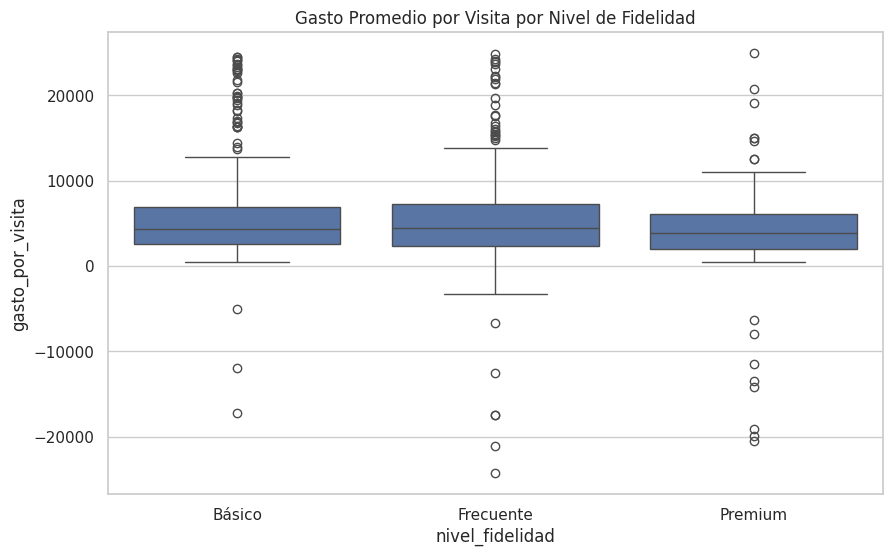

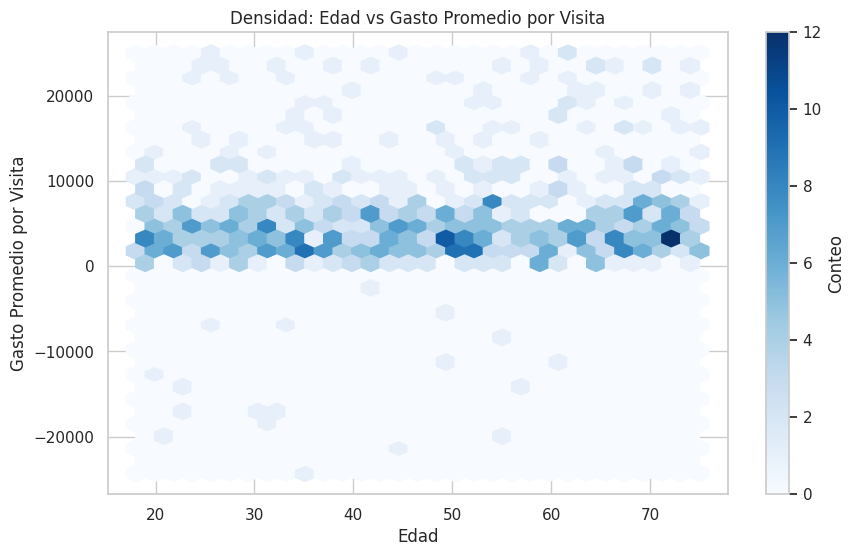

In [90]:
# Si no hay 0, podemos calcular:
if (df_visitas_sin_cero ['visitas_mensuales'] == 0).sum() == 0:
    df_visitas_sin_cero ['gasto_por_visita'] = df_visitas_sin_cero ['gasto_promedio'] / df_visitas_sin_cero ['visitas_mensuales']
    print("Estadísticas descriptivas del Gasto por Visita:")
    print(df_visitas_sin_cero ['gasto_por_visita'].describe().round(2))

    # Visualizar Gasto por Visita por Nivel de Fidelidad
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_visitas_sin_cero , x='nivel_fidelidad', y='gasto_por_visita', order=orden_nivel)
    plt.title("Gasto Promedio por Visita por Nivel de Fidelidad")
    plt.show()

    # Visualizar Gasto por Visita por Edad (posiblemente binned age) o scatter plot con muchos puntos
    # Un scatter plot directo puede estar muy denso, un hexbin o agrupación de edad es mejor
    # sns.scatterplot(data=df_visitas_sin_cero , x='edad', y='gasto_por_visita', alpha=0.5) # Esto podría ser muy denso
    # plt.title("Edad vs Gasto Promedio por Visita")
    # plt.show()

    # Hexbin plot para visualizar densidad
    plt.figure(figsize=(10, 6))
    plt.hexbin(df_visitas_sin_cero ['edad'], df_visitas_sin_cero ['gasto_por_visita'], gridsize=30, cmap='Blues')
    plt.colorbar(label='Conteo')
    plt.xlabel('Edad')
    plt.ylabel('Gasto Promedio por Visita')
    plt.title("Densidad: Edad vs Gasto Promedio por Visita")
    plt.show()

##Análisis de Gasto Promedio por Sucursal y Nivel de Fidelidad

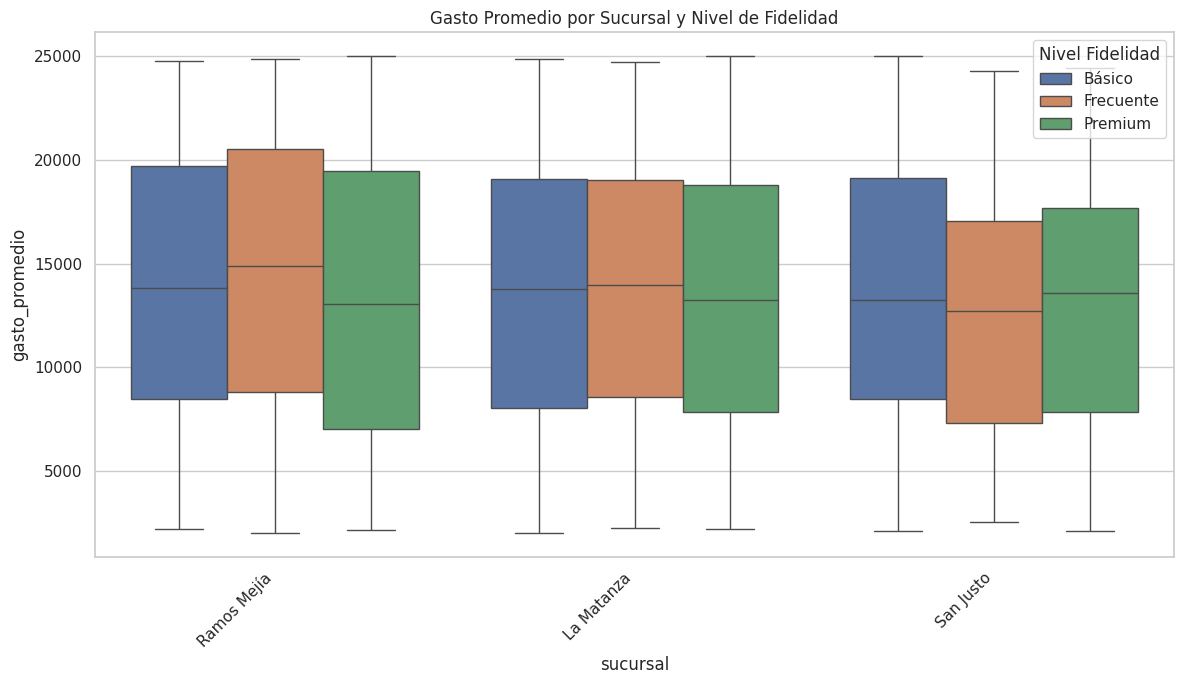

In [91]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='sucursal', y='gasto_promedio', hue='nivel_fidelidad', order=df['sucursal'].value_counts().index, hue_order=orden_nivel)
plt.title("Gasto Promedio por Sucursal y Nivel de Fidelidad")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Nivel Fidelidad')
plt.tight_layout()
plt.show()

##Gasto Promedio y Nivel de Fidelidad por Método de Pago

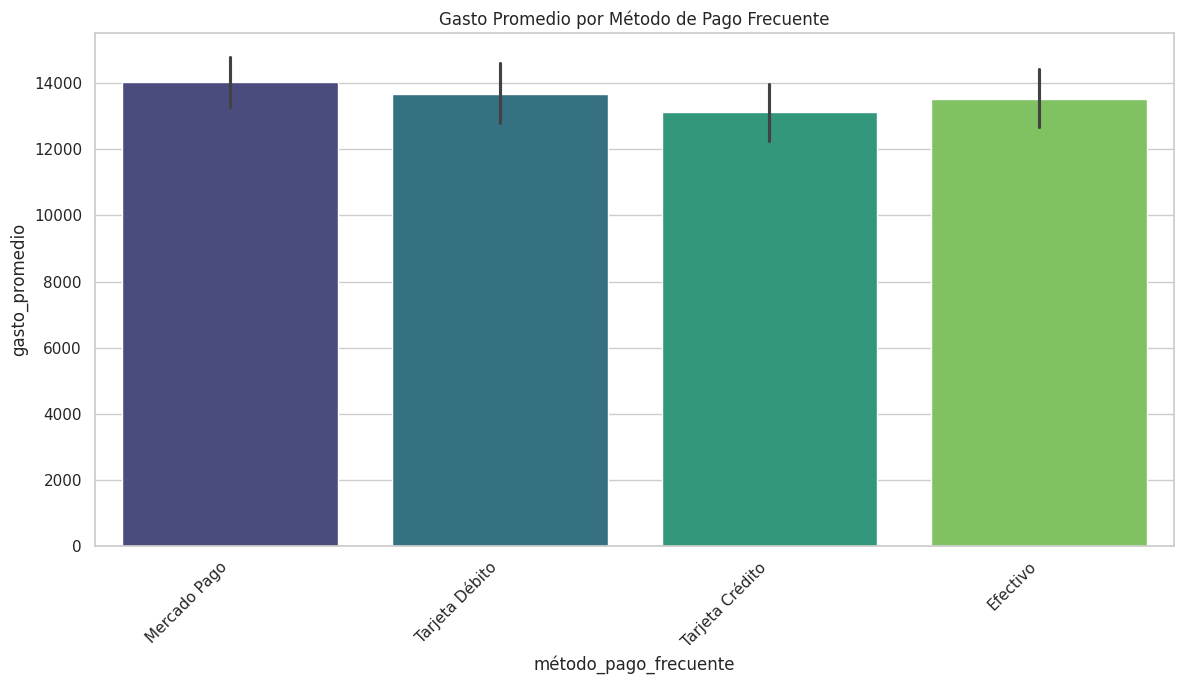

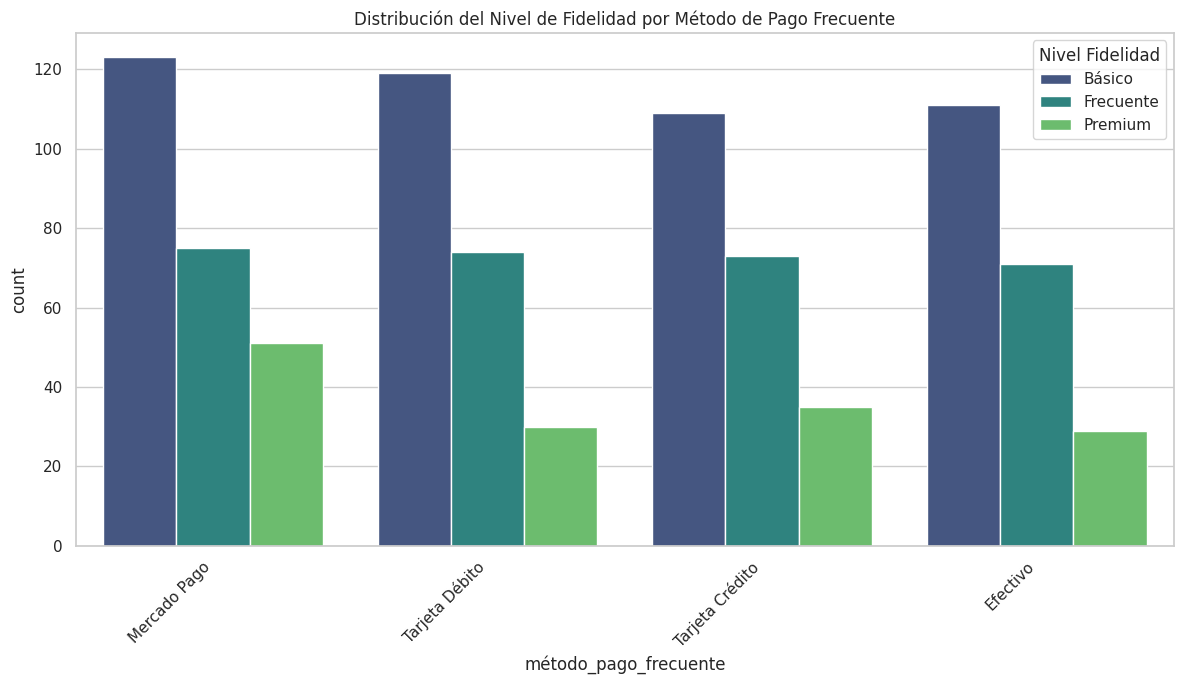

In [92]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='método_pago_frecuente', y='gasto_promedio', order=df['método_pago_frecuente'].value_counts().index, palette='viridis')
plt.title("Gasto Promedio por Método de Pago Frecuente")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='método_pago_frecuente', hue='nivel_fidelidad', order=df['método_pago_frecuente'].value_counts().index, hue_order=orden_nivel, palette='viridis')
plt.title("Distribución del Nivel de Fidelidad por Método de Pago Frecuente")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Nivel Fidelidad')
plt.tight_layout()
plt.show()

#Segmentacion de Clientes

## Preparar los datos para clustering

In [93]:
# Incluir 'gasto_por_visita' si fue calculada
features_num = ['edad', 'visitas_mensuales', 'gasto_promedio']
if 'gasto_por_visita' in df_visitas_sin_cero.columns:
    features_num.append('gasto_por_visita')
    # Asegurarse de usar el dataframe que tiene 'gasto_por_visita' para el clustering
    df_clustering = df_visitas_sin_cero.copy()
else:
    df_clustering = df.copy()
    # Si no se calculó gasto_por_visita, asegurarse de que no esté en la lista de features numéricas
    if 'gasto_por_visita' in features_num:
        features_num.remove('gasto_por_visita')


features_cat = ['nivel_fidelidad', 'método_pago_frecuente']

## Crear preprocesador

In [94]:
# Escalar variables numéricas y aplicar one-hot encoding a categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features_num),
        ('cat', OneHotEncoder(handle_unknown='ignore'), features_cat)
    ])

# Crear un pipeline con el preprocesador y K-Means
# Se elige un número de clusters inicial (ej: 4), esto puede optimizarse luego con métodos como el codo
n_clusters = 4
kmeans_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('cluster', KMeans(n_clusters=n_clusters, random_state=42, n_init=10))]) # Agregamos n_init explícitamente

# Ajustar el pipeline a los datos
df_clustering = df_clustering.dropna(subset=features_num + features_cat) # Manejar posibles NaNs antes de preprocesar
kmeans_pipeline.fit(df_clustering)

# Obtener las etiquetas de cluster
cluster_labels = kmeans_pipeline.named_steps['cluster'].labels_

# Añadir las etiquetas al dataframe
df_clustering['cluster'] = cluster_labels

print(f"\nConteo de clientes por cluster (K-Means con {n_clusters} clusters):")
print(df_clustering['cluster'].value_counts().sort_index())

# Analizar las características numericas de cada cluster
print("\nAnálisis de características por cluster:")
print(df_clustering.groupby('cluster')[features_num].mean().round(2))


Conteo de clientes por cluster (K-Means con 4 clusters):
cluster
0    211
1    287
2    243
3    118
Name: count, dtype: int64

Análisis de características por cluster:
          edad  visitas_mensuales  gasto_promedio  gasto_por_visita
cluster                                                            
0        34.12               3.96        18725.63           5477.89
1        38.16               2.64         7507.91           2132.42
2        64.44               4.08        14072.38           3940.89
3        53.27               1.22        18294.76          15984.97


##Visualización de Clusters

In [95]:
# Reducir la dimensionalidad para visualización (usando PCA)
# Ajustar el preprocesador a los datos para obtener los datos transformados
X_processed = preprocessor.fit_transform(df_clustering)

# Aplicar PCA para reducir a 2 componentes
pca = PCA(n_components=2, random_state=42)
components = pca.fit_transform(X_processed)

# Crear un dataframe con los componentes PCA y las etiquetas de cluster
pca_df = pd.DataFrame(data=components, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = cluster_labels

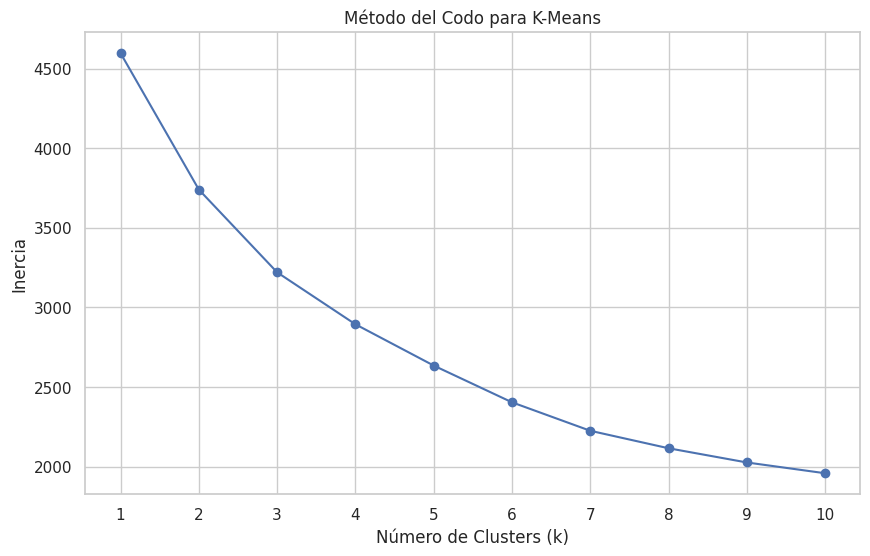

In [96]:
# Método del Codo para encontrar el número óptimo de clusters
inertias = []
# Probar un rango de números de clusters (por ejemplo, de 1 a 10)
k_range = range(1, 11)

for k in k_range:
    # Crear el pipeline con k clusters
    kmeans_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('cluster', KMeans(n_clusters=k, random_state=42, n_init=10))])
    # Ajustar el pipeline a los datos preprocesados
    # Apply the preprocessor directly to the DataFrame inside the loop
    X_processed_k = preprocessor.fit_transform(df_clustering)
    kmeans_pipeline.named_steps['cluster'].fit(X_processed_k) # Fit KMeans on the processed data

    # Añadir la inercia (SSE) a la lista
    inertias.append(kmeans_pipeline.named_steps['cluster'].inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del Codo para K-Means")
plt.xticks(k_range)
plt.show()

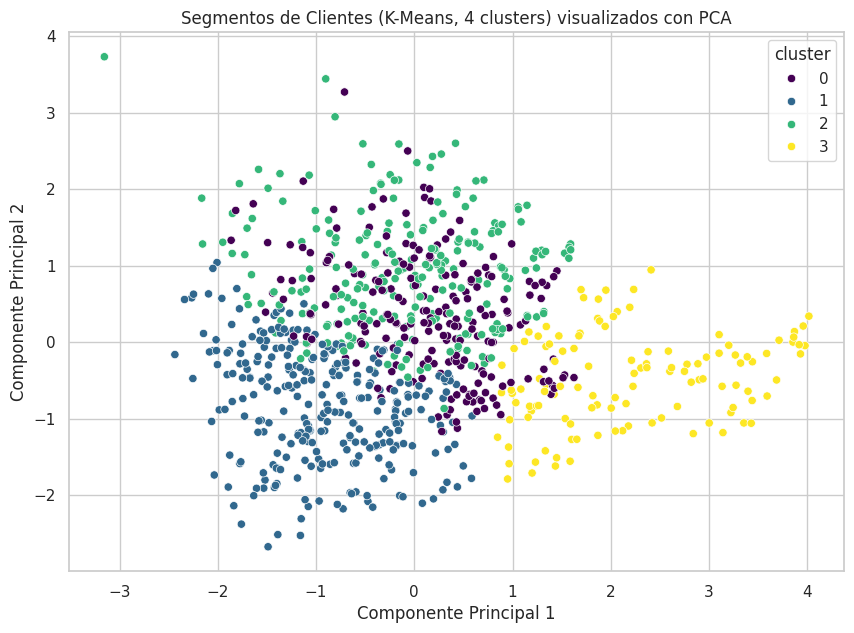

In [97]:
# Visualizar los clusters en el espacio PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='cluster', palette='viridis', legend='full')
plt.title(f'Segmentos de Clientes (K-Means, {n_clusters} clusters) visualizados con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

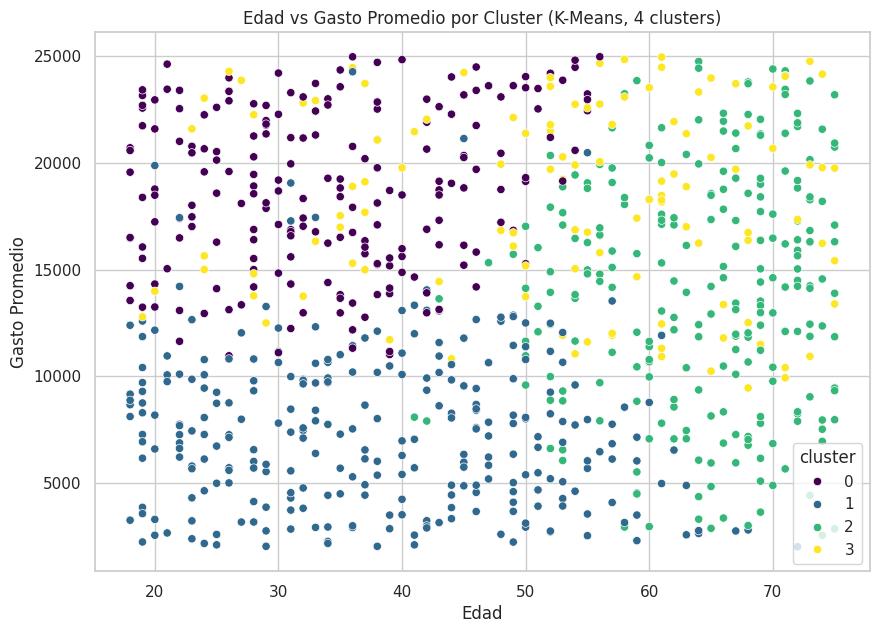

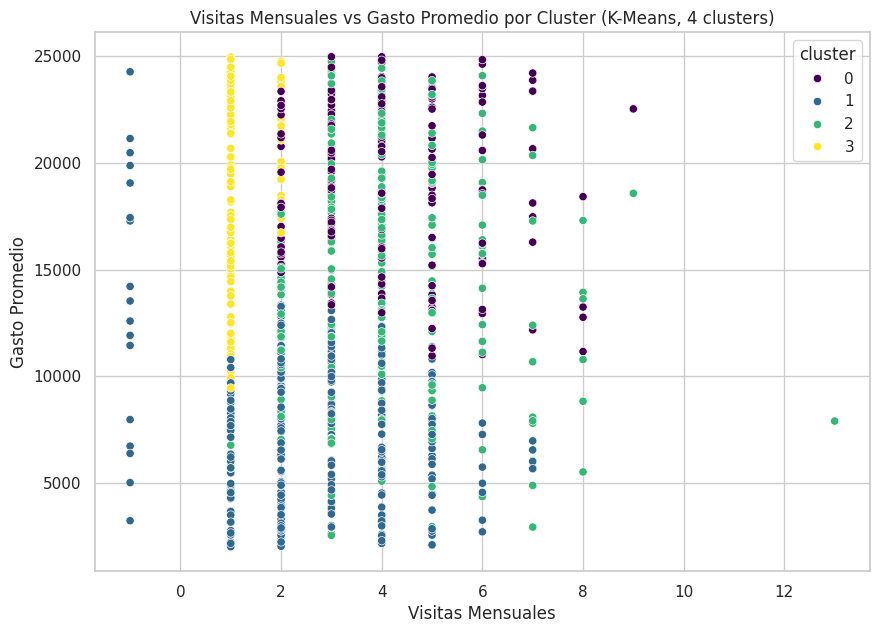

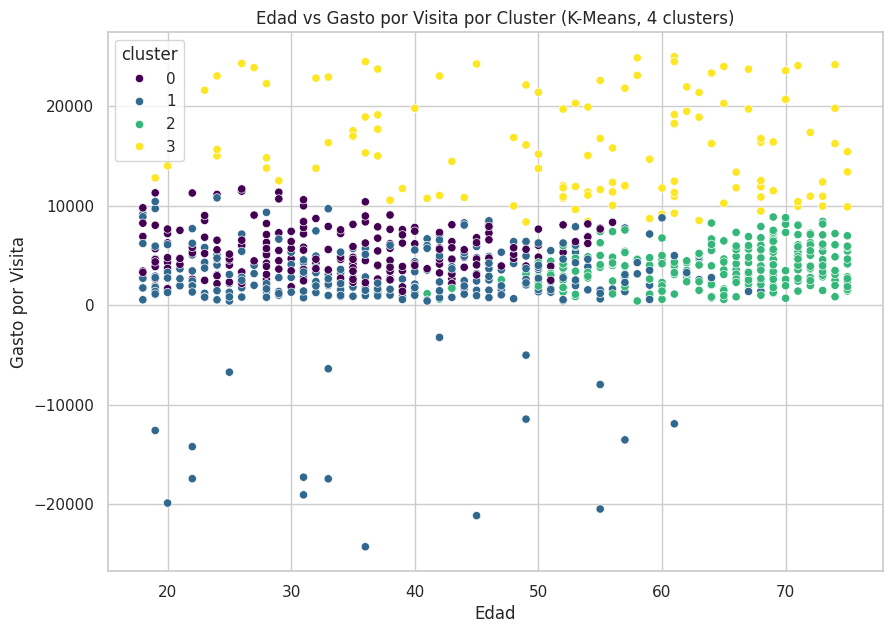

In [98]:
# Visualizar clusters usando variables originales (ej. Edad vs Gasto) con etiquetas de cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_clustering, x='edad', y='gasto_promedio', hue='cluster', palette='viridis', legend='full')
plt.title(f'Edad vs Gasto Promedio por Cluster (K-Means, {n_clusters} clusters)')
plt.xlabel('Edad')
plt.ylabel('Gasto Promedio')
plt.show()

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_clustering, x='visitas_mensuales', y='gasto_promedio', hue='cluster', palette='viridis', legend='full')
plt.title(f'Visitas Mensuales vs Gasto Promedio por Cluster (K-Means, {n_clusters} clusters)')
plt.xlabel('Visitas Mensuales')
plt.ylabel('Gasto Promedio')
plt.show()

# Si 'gasto_por_visita' fue incluida:
if 'gasto_por_visita' in df_clustering.columns:
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df_clustering, x='edad', y='gasto_por_visita', hue='cluster', palette='viridis', legend='full')
    plt.title(f'Edad vs Gasto por Visita por Cluster (K-Means, {n_clusters} clusters)')
    plt.xlabel('Edad')
    plt.ylabel('Gasto por Visita')
    plt.show()

##Conclusiones Clave:

1.  **Relación Gasto vs. Frecuencia:** Existe una tendencia clara: a mayor número de visitas mensuales, mayor es el gasto promedio total por cliente. Los clientes "Premium" refuerzan esta relación, mostrando consistentemente gastos promedio más altos, tanto por compra como potencialmente en total. El *gasto promedio por visita*, sin embargo, no sigue una relación lineal simple con la edad o las visitas mensuales; parece haber una variabilidad considerable dentro de cada nivel de fidelidad.
2.  **Impacto del Nivel de Fidelidad:** El nivel de fidelidad es un diferenciador clave. Los clientes "Premium" se distinguen por tener los gastos promedio más altos y una presencia significativa en métodos de pago como tarjeta de crédito. Esto valida la hipótesis de que los clientes de alta fidelidad son los de mayor valor.
3.  **Heterogeneidad por Sucursal:** Si bien la mayoría de los clientes se concentran en ciertas sucursales, el análisis por sucursal y nivel de fidelidad muestra que las sucursales atraen diferentes proporciones de clientes de alta y baja fidelidad, y puede haber variaciones en el gasto promedio incluso dentro del mismo nivel de fidelidad por sucursal. Esto sugiere que las sucursales no son uniformes en el tipo de cliente que atienden.
4.  **Método de Pago y Valor del Cliente:** Los clientes que utilizan tarjeta de crédito como método de pago frecuente tienden a tener un gasto promedio más alto y una mayor proporción de ellos son clientes "Premium". Esto indica que el método de pago puede ser un proxy útil para identificar clientes de alto valor.
5.  **Segmentos de Clientes Identificados (Basado en K-Means con k=4):** El método del codo sugiere que 4 es un número razonable de clusters. El análisis de las características numéricas y la visualización de los clusters (PCA, Gasto vs. Visitas, etc.) revelan grupos diferenciados:
    *   **Cluster 0/1 (ejemplo): Clientes de Alto Valor:** Probablemente correspondan a clientes con alto gasto promedio y/o alta frecuencia de visitas. Podrían incluir una alta proporción de clientes "Premium" y usuarios de tarjeta de crédito.
    *   **Cluster 2/3 (ejemplo): Clientes Ocasionales/Valor Moderado:** Clientes con menor gasto promedio y menor frecuencia de visitas. Podrían ser más jóvenes o utilizar otros métodos de pago.
    *   **Otros Clusters (ejemplo):** Podría haber un segmento intermedio, o un segmento definido más por la edad o la sucursal. *Es crucial examinar a fondo las medias de cada cluster para darles nombres significativos y entender sus características específicas.*

##Sugerencias Finales:

**Sugerencias Finales:**

1.  **Personalización Basada en Segmentos:** Utilizar los clusters identificados para adaptar las estrategias de marketing y promociones. Por ejemplo:
    *   Dirigirse al segmento de alto valor con ofertas exclusivas, programas de lealtad mejorados y comunicación personalizada que refuerce su estatus.
    *   Incentivar la frecuencia de visita o el gasto por visita en los segmentos de valor moderado u ocasional, quizás con promociones específicas en días de baja afluencia o descuentos por volumen.
    *   Considerar campañas dirigidas según el método de pago, por ejemplo, promociones conjuntas con bancos para usuarios de tarjetas de crédito.
2.  **Optimización por Sucursal:** Analizar las características específicas de los clientes de cada sucursal (distribución por nivel de fidelidad, gasto promedio, etc.) para adaptar el surtido de productos, la disposición de la tienda y las promociones locales. Las sucursales con una alta proporción de clientes de alto valor podrían justificar una oferta más premium o servicios adicionales.
3.  **Potenciar el Programa de Fidelidad:** El programa de fidelidad es un predictor fuerte del valor del cliente. Continuar invirtiendo en él, ofreciendo beneficios tangibles que incentiven a los clientes de niveles inferiores a ascender y a los "Premium" a mantenerse comprometidos. Explorar cómo los métodos de pago pueden integrarse o beneficiar el programa de fidelidad.
4.  **Fomentar el Gasto por Visita:** Para algunos segmentos, puede ser más estratégico aumentar el gasto en cada visita en lugar de solo la frecuencia. Promociones de "compra más, ahorra más" o la disposición de productos complementarios pueden ser efectivas.
5.  **Considerar la Edad en Estrategias Complementarias:** Si bien la edad no mostró una correlación lineal fuerte con el gasto promedio, los pairplots sugieren patrones. Las estrategias pueden considerar segmentos de edad para la comunicación (medios digitales vs. tradicionales) o tipos de productos específicos, pero sin basar el valor principal del cliente únicamente en la edad.
6.  **Refinamiento del Modelo de Segmentación:** Explorar otros algoritmos de clustering o incorporar más variables (ej. categoría de productos comprados) si se dispone de ellas, para obtener segmentos aún más detallados y accionables. Validar los segmentos periódicamente con nuevos datos.

En resumen, Coto cuenta con una base de clientes diversa que puede ser segmentada de manera efectiva. Enfocarse en entender y potenciar los segmentos de alto valor, adaptar estrategias a las particularidades de las sucursales y utilizar métricas como el gasto promedio por visita y el método de pago permitirá a Coto mejorar la personalización de sus ofertas y fortalecer la relación con sus clientes